In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit


In [ ]:
housing = load_boston() # Loading the housing data
housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 1.Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


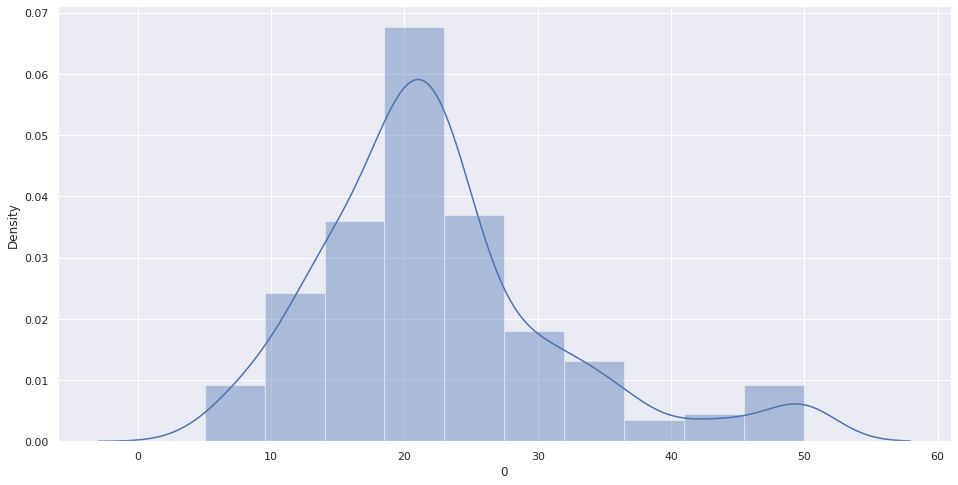

In [ ]:
#  distribution of the target variable
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot(target[0], bins=10)
plt.show()


We can see that values of Target are normally distributed with few outliers.

In [ ]:
stats_avg = {}
stats_max = {}
stats_min = {}
for i in range(13):
  stats_avg[housing["feature_names"][i]] = np.average(data[i])        #Average
  stats_max[housing["feature_names"][i]] = np.amax(data[i])           #Max
  stats_min[housing["feature_names"][i]] = np.amin(data[i])           #Min

stats_avg['target'] = np.average(target[0])
stats_max['target'] = np.amax(target[0])
stats_min['target'] = np.amin(target[0])
print("AVG : ")
print(stats_avg)
print("MAX : ")
print(stats_max)
print("MIN : ")
print(stats_min)

AVG : 
{'CRIM': 3.613523557312254, 'ZN': 11.363636363636363, 'INDUS': 11.13677865612648, 'CHAS': 0.0691699604743083, 'NOX': 0.5546950592885376, 'RM': 6.284634387351779, 'AGE': 68.57490118577076, 'DIS': 3.795042687747036, 'RAD': 9.549407114624506, 'TAX': 408.2371541501976, 'PTRATIO': 18.455533596837945, 'B': 356.6740316205534, 'LSTAT': 12.653063241106722, 'target': 22.532806324110677}
MAX : 
{'CRIM': 88.9762, 'ZN': 100.0, 'INDUS': 27.74, 'CHAS': 1.0, 'NOX': 0.871, 'RM': 8.78, 'AGE': 100.0, 'DIS': 12.1265, 'RAD': 24.0, 'TAX': 711.0, 'PTRATIO': 22.0, 'B': 396.9, 'LSTAT': 37.97, 'target': 50.0}
MIN : 
{'CRIM': 0.00632, 'ZN': 0.0, 'INDUS': 0.46, 'CHAS': 0.0, 'NOX': 0.385, 'RM': 3.561, 'AGE': 2.9, 'DIS': 1.1296, 'RAD': 1.0, 'TAX': 187.0, 'PTRATIO': 12.6, 'B': 0.32, 'LSTAT': 1.73, 'target': 5.0}


In [ ]:
data = data.set_axis(housing["feature_names"], axis=1)

In [ ]:
data['Target'] = target[0]
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
cm = data.drop("Target", axis=1).apply(lambda x: x.corr(data.Target))
print(cm)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64


* values close to 1 tell that there is a strong positive correlation between the coloumn and target. If value is close to -1 it shows there is a strong negative correlation between the coloumn and target.

* We can see that RM has a strong positive correlation with the Target(0.69) whereas LSTAT has strong negative correlation with the Target(-0.73).

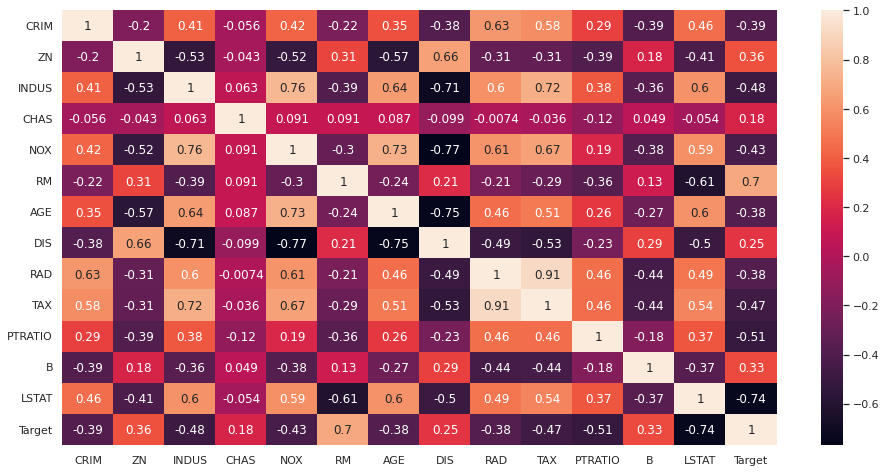

In [ ]:
sns.heatmap(data=data.corr(), annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

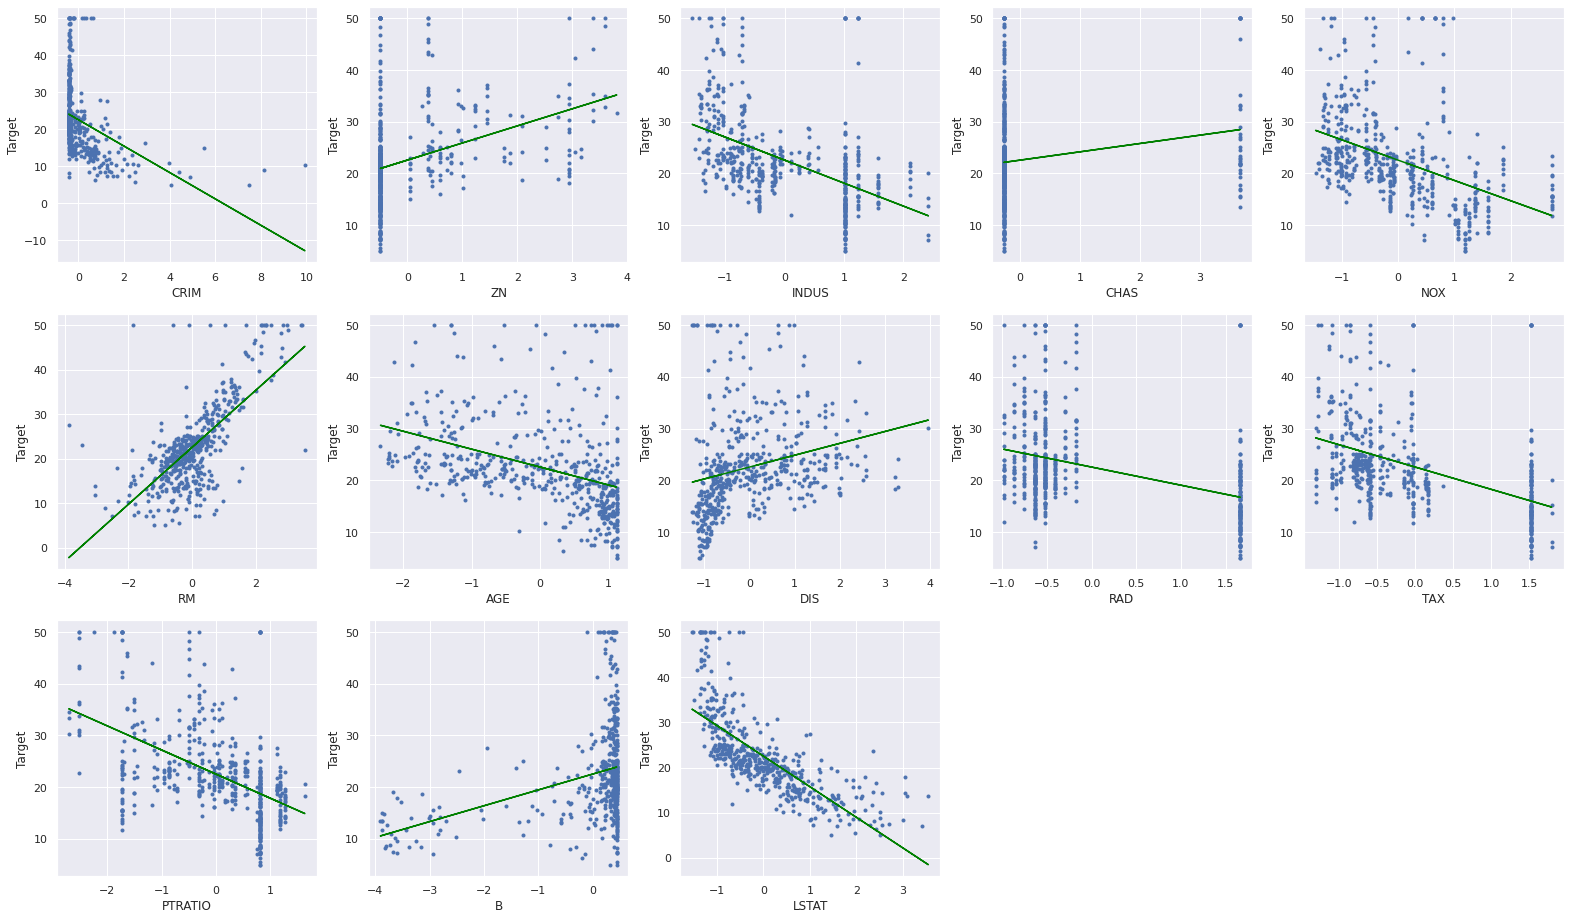

In [ ]:
plt.figure(figsize = (27,16))
#plt.title("CORRELATIONS")
for i in range(13):
  plt.subplot(3, 5 , i+1)
  x = data[housing["feature_names"][i]]
  y = target
  plt.scatter(x, y, marker='.')
  b, m = polyfit(x, y, 1)
  plt.plot(x, b + m * x, '-',c='green')
  titl = housing["feature_names"][i]
  plt.xlabel(housing["feature_names"][i])
  plt.ylabel('Target')

* Above show the coorelation of each column with the target values in the dataset using multi-plots.
* The price increases as the value of RM increases. This also shows that Target and RM have strong positive correlation.
* The price decreases as value of LSTAT increases. This also shows that Target and LSTAT have strong negative correlation.

### 2.Perform data pre-processing operations like standardization and splitting (80:20) of data.

In [ ]:
# Standardize and Splitting Dataset
for col in housing["feature_names"]:
  data[col] = (data[col] - np.mean(data[col]))/np.std(data[col])

data['Target'] = (data['Target'] - np.mean(data['Target']))/np.std(data['Target'])

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [ ]:
hous_train=data.sample(frac=0.8,random_state=200)   # Splitting of Data
hous_test=data.drop(hous_train.index)

In [ ]:
hous_y_train = hous_train['Target']
hous_x_train = hous_train.drop(['Target'], axis = 1)

hous_y_test = hous_test['Target']
hous_x_test = hous_test.drop(['Target'], axis = 1)


In [ ]:
hous_x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
207,-0.391193,-0.487722,-0.079780,-0.272599,-0.567496,-0.714658,0.146691,0.266139,-0.637962,-0.779455,0.066796,0.359148,0.757911
13,-0.347230,-0.487722,-0.437258,-0.272599,-0.144217,-0.478164,-0.240919,0.433754,-0.637962,-0.601276,1.176466,0.441052,-0.615792
22,-0.277091,-0.487722,-0.437258,-0.272599,-0.144217,-0.203205,0.822342,0.086449,-0.637962,-0.601276,1.176466,0.441052,0.850425
369,0.239316,-0.487722,1.015999,3.668398,0.659147,0.567535,1.003701,-1.159113,1.661245,1.530926,0.806576,0.204551,-1.250780
444,1.069328,-0.487722,1.015999,-0.272599,1.600725,-0.613507,0.996589,-0.902936,1.661245,1.530926,0.806576,-1.273554,1.561107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,-0.303859,-0.487722,-0.437258,-0.272599,-0.144217,0.554713,0.665875,0.211044,-0.637962,-0.601276,1.176466,0.258276,-0.094346
337,-0.416979,-0.487722,-0.867691,-0.272599,-0.342899,-0.555096,-0.319153,0.865152,-0.523001,-1.094237,0.806576,0.418136,-0.293393
483,-0.092533,-0.487722,1.015999,-0.272599,-0.196047,-0.744576,-1.005472,0.144159,1.661245,1.530926,0.806576,0.397414,-0.313017
234,-0.368393,-0.487722,-0.720322,3.668398,-0.412006,0.628795,-0.073785,-0.068046,-0.178120,-0.601276,-0.488039,0.038660,-0.645229


In [ ]:
hous_y_train

207   -0.003571
13    -0.232129
22    -0.798084
369    2.989460
444   -1.276969
         ...   
29    -0.166827
337   -0.438920
483   -0.079757
234    0.703873
220    0.453547
Name: Target, Length: 405, dtype: float64

In [ ]:
hous_x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.387983,-0.487722,-0.211099,-0.272599,0.261784,-0.510932,-0.923682,-0.671859,-0.408041,-0.102376,0.344213,0.441052,0.131334
497,-0.389285,-0.487722,-0.211099,-0.272599,0.261784,-0.698987,0.072014,-0.428946,-0.408041,-0.102376,0.344213,0.441052,0.202823
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048


In [ ]:
hous_y_test

0      0.159686
1     -0.101524
3      1.182758
6      0.039964
7      0.497082
         ...   
494    0.214104
497   -0.460688
502   -0.210362
503    0.148802
505   -1.157248
Name: Target, Length: 101, dtype: float64

### 3.Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.

###4.Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions.

In [ ]:
class MLP:
  def __init__(self, learning_rate, nodes_per_layer, X, y,hidden_func, output_func):
    self.lr = learning_rate
    self.X = X.T
    y = y.T
    self.y = []
    self.y.append(y)
    self.y = np.array(self.y)
    (self.input_nodes, self.hidden_nodes, self.output_nodes) = nodes_per_layer
    self.input_weights = np.random.uniform(low=-0.05, high=0.05, size=(self.input_nodes, self.hidden_nodes))
    self.hidden_weights = np.random.uniform(low=-0.05, high=0.05,size=(self.hidden_nodes, self.output_nodes))
    self.input_bias = np.random.uniform(low=-0.05, high=0.05,size=(self.hidden_nodes, 1))
    self.hidden_bias = np.random.uniform(low=-0.05, high=0.05,size=(self.output_nodes, 1))
    self.hidden_activations = None
    self.y_pred = None
    self.hidden_func = hidden_func
    self.output_func = output_func

  def sigmoid(self, z):                       # Sigmoid Function
    
    return 1 / (1 + np.exp(-z))
        

  def deriv_sigmoid(self, fx):               # Derivative of Sigmoid
    return fx * (1 - fx)

  def tanh(self, z):                        # Tanh function
    return np.tanh(z)

  def deriv_tanh(self, fx):                 # Derivative of Tanh
    return (1 - fx**2)

  def calcWeights(self, error_input_hidden, hidden_output_error):
    
    self.input_weights = self.input_weights - self.lr * error_input_hidden                      # Update weights coming from the input to hidden layer
    self.hidden_weights = self.hidden_weights - self.lr * hidden_output_error                   # Update wieghts coming from the hidden layer to output layer
    self.input_bias = self.input_bias - self.lr * np.sum(self.input_bias)                       # Update bias coming from the input to hidden layer
    self.hidden_bias = self.hidden_bias - self.lr * np.sum(self.hidden_bias)                    # Update bias coming from hidden layer to output layer

  def forward_propagation(self):
    hidden_z = np.dot(self.input_weights.T, self.X) + self.input_bias                           # hidden layer z = wx + b
    if(self.hidden_func == 'sigmoid'):
      self.hidden_activations = self.sigmoid(hidden_z) 
    else:
      self.hidden_activations = self.tanh(hidden_z)

    output_z = np.dot(self.hidden_weights.T, self.hidden_activations) + self.hidden_bias        # Output Layer z = wx + b
    if(self.output_func == 'sigmoid'):
      self.y_pred = self.sigmoid(output_z) 
    else:
      self.y_pred = self.tanh(output_z)
    
    
    

  def backward_propagation(self):
    error_change = -(self.y - self.y_pred)                                                      # rate of change of error w.r.t weight between hidden and output layer
    
    if(self.output_func == 'sigmoid'):
      op_rate = self.deriv_sigmoid(self.y_pred) 
    else:
      op_rate = self.deriv_tanh(self.y_pred)

    
    hidden_output = self.hidden_activations
    
    
    hidden_output_error= np.dot(hidden_output, (error_change * op_rate).T)
    if(self.hidden_func == 'sigmoid'):
      hidden_rate = self.deriv_sigmoid(hidden_output)
    else:
      hidden_rate = self.deriv_tanh(hidden_output)
   
    error_input_hidden = np.dot(self.X,(hidden_rate* np.dot(self.hidden_weights,(op_rate * error_change))).T) #rate of change of error w.r.t weights between input and hidden layer
    self.calcWeights(error_input_hidden, hidden_output_error)                                                 # weight update
    e = self.error()
    l = np.average(e)
    return l

  def predict(self, X, y_true):
    X = X.T
    y_true = y_true.T
    y = []
    y.append(y_true)
    self.y = np.array(y)
    hidden_z = np.dot(self.input_weights.T,X) + self.input_bias                                                 # Predict hidden layer values
    if(self.hidden_func == 'sigmoid'):
     
      hidden_activations = self.sigmoid(hidden_z) 
    else:
      
      hidden_activations = self.tanh(hidden_z)
    
    output_z = np.dot(self.hidden_weights.T, hidden_activations) + self.hidden_bias                             # Predict Output Layer
    if(self.output_func == 'sigmoid'):
      self.y_pred = self.sigmoid(output_z) 
    else:
      self.y_pred = self.tanh(output_z)
    e = self.error()
    return np.average(e), 1-np.average(e)

  def batchGradient(self,epoch):
    losses = []
    for i in range(epoch):
      self.forward_propagation()                                                    
      l = self.backward_propagation()
      losses.append(l)
    return losses[-1], 1-losses[-1]

  

  def stochasticGradient(self,epoch):
    losses = []
    X_temp = self.X.T
    Y_temp = self.y.T
    for i in range(epoch):
      epoch_loss = []
      for j in range(len(X_temp)):
        self.X = X_temp[j].T                                                          # Find Gradient for each example one by one and update the weights
        self.y = Y_temp[j].T
        self.X = self.X[:, np.newaxis]
        self.y = self.y[:, np.newaxis]
        #print(self.y.shape)
        self.forward_propagation()
        l = self.backward_propagation()
        epoch_loss.append(l)
      losses.append(np.mean(epoch_loss))
    return losses[-1], 1-losses[-1]


  def error(self):
    return (((self.y_pred - self.y))**2)/2

  

In [ ]:
dat = hous_x_train.to_numpy()
targe = hous_y_train.to_numpy()

In [ ]:
bgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'sigmoid')
loss, _ = bgd.batchGradient(100)
print(loss)


0.32135080611378225


In [ ]:
bgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'tanh')
loss, _ = bgd.batchGradient(100)
print(loss)

0.274405326913291


In [ ]:
bgd = MLP(0.01,(13, 15, 1), dat, targe,'tanh', 'sigmoid')
loss, _ = bgd.batchGradient(100)
print(loss)

0.3614229383189245


In [ ]:
bgd = MLP(0.01,(13, 15, 1), dat, targe,'tanh', 'tanh')
loss, _ = bgd.batchGradient(100)
print(loss)

0.27645848480165924


In [ ]:
sgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'sigmoid')
loss, _ = sgd.stochasticGradient(100)
print(loss)

0.108393762680263


In [ ]:
sgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'tanh')
loss, _ = sgd.stochasticGradient(100)
print(loss)

0.08100644357863501


In [ ]:
sgd = MLP(0.01,(13, 15, 1), dat, targe,'tanh', 'sigmoid')
loss, _ = sgd.stochasticGradient(100)
print(loss)

0.14885362534581062


In [ ]:
sgd = MLP(0.01,(13, 15, 1), dat, targe,'tanh', 'tanh')
loss, _ = sgd.stochasticGradient(100)
print(loss)

0.06158301624921539


* We can see the model performs best for tanh activation function for both batch and stochastic gradient.
* Number of output layer units taken is 1.

### 5.Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. 

In [ ]:

loss_bgd = []
loss_sgd = []
for i in range(1, 51):
  bgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'sigmoid')
  loss, _ = bgd.batchGradient(i)
  loss_bgd.append(loss)
  sgd = MLP(0.01,(13, 15, 1), dat, targe,'sigmoid', 'sigmoid')
  loss, _ = sgd.stochasticGradient(i)
  loss_sgd.append(loss)
  


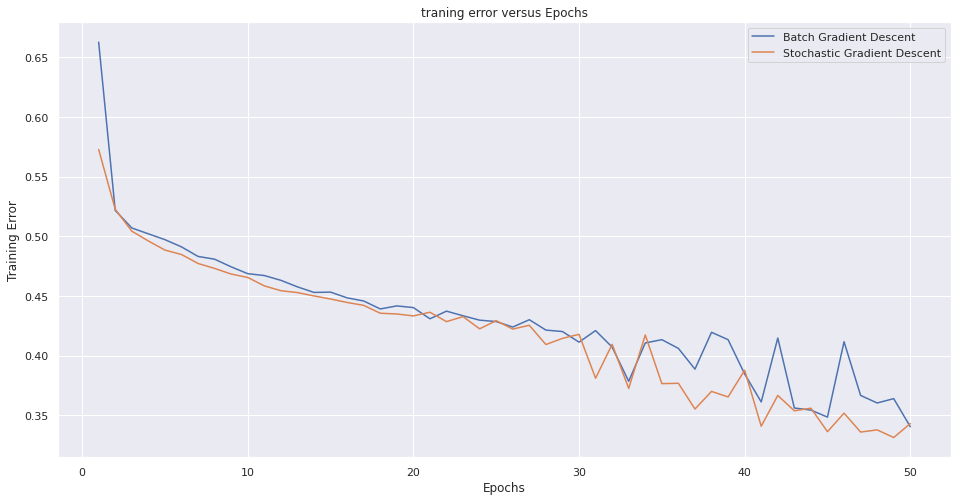

In [ ]:
x_axis = [*range(1, 51, 1)]
plt.plot(x_axis, loss_bgd, label = "Batch Gradient Descent")
plt.plot(x_axis, loss_sgd, label = "Stochastic Gradient Descent")
plt.title("traning error versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.legend()
plt.show()

* **Hyperparameters passed:**
* Learning rate = 0.01
* Hidden Layer units = 15
* Output Layer units = 1
* Activation function = Sigmoid

* We can clearly see from the graph that Stochastic Gradient Descent perform better than Batch Gradient Descent.

In [ ]:
bgd = MLP(0.1,(13, 15, 1), dat, targe,'tanh', 'tanh')
_,_ = bgd.batchGradient(100)
_,acc = bgd.predict(hous_x_test, hous_y_test)
print("Accuracy of Test Data in Batch Gradient Descent :")
print(acc)


Accuracy of Test Data in Batch Gradient Descent :
0.6365767474596182


* Above shows the accuracy on testing data using Batch Gradient Descent

In [ ]:
sgd = MLP(0.1,(13, 15, 1), dat, targe,'tanh', 'tanh')
_,_ = sgd.stochasticGradient(100)
_,acc = sgd.predict(hous_x_test, hous_y_test)
print("Accuracy of Test Data in Stochastic Gradient Descent :")
print(acc)


Accuracy of Test Data in Stochastic Gradient Descent :
0.8438284473266915


* Above shows the accuracy on testing data using Stochastic Gradient Descent

### 6.Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].

In [ ]:
learn_rate = [0.5,  0.1, 0.01, 0.001, 0.0001]
loss_lr = []
accuracy_lr = []
for lr in learn_rate:
  loss_epoch = []
  acc_epoch = []
  for j in range(1,101,1):
    sgd = MLP(lr,(13, 15, 1), dat, targe, 'tanh', 'tanh')
    loss, acc = sgd.stochasticGradient(j)
    loss_epoch.append(loss)
    acc_epoch.append(acc)
  loss_lr.append(loss_epoch)
  accuracy_lr.append(acc_epoch)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in subtract


Learning rate 0.5 is leads to large values which is leading to overflow. So, using learning rate of 0.5 is not good as 0.5 is a very large learining rate.

### 7.Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations.

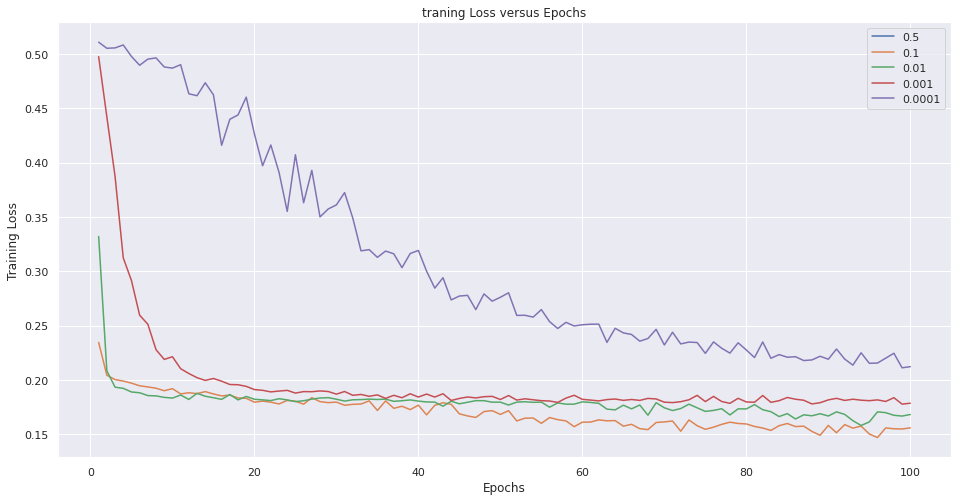

In [ ]:
for i in range(5):
  plt.plot(x_axis,loss_lr[i] , label = learn_rate[i])

plt.title("traning Loss versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

* We can see that learing rate of 0.1 gives the least training loss

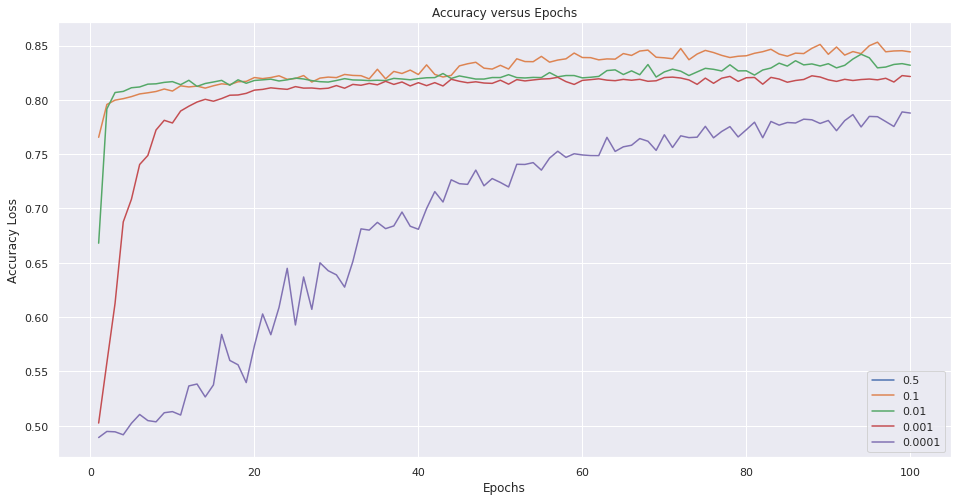

In [ ]:
for i in range(5):
  plt.plot(x_axis,accuracy_lr[i] , label = learn_rate[i])

plt.title("Accuracy versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Loss")
plt.legend()
plt.show()

We can see that learning rate of 0.1 gives best accuracy.